In [1]:
from load_data import load_bars
from trend_scanning import trend_scanning_labels, plot_trend_labels

In [2]:
# Load bar data
SYMBOL = 'EURUSD'
BAR_TYPE = 'tick'

print(f"Loading {SYMBOL} {BAR_TYPE} bars...")
df = load_bars(SYMBOL, BAR_TYPE)
close = df['close']

print(f"✓ Loaded {len(df):,} bars")
print(f"  Date range: {df.index[0]} to {df.index[-1]}")
print(f"  Columns: {list(df.columns)}")

INFO: Loading tick bars from: EURUSD_tick_bars_20251101_170526.csv


Loading EURUSD tick bars...


INFO: Loaded 686,033 tick bars
INFO:   Start: 2023-01-02 07:33:51.458001
INFO:   End: 2025-10-31 22:58:59.181001
INFO:   Columns: ['open', 'high', 'low', 'close', 'tick_volume']
INFO:   Start: 2023-01-02 07:33:51.458001
INFO:   End: 2025-10-31 22:58:59.181001
INFO:   Columns: ['open', 'high', 'low', 'close', 'tick_volume']


✓ Loaded 686,033 bars
  Date range: 2023-01-02 07:33:51.458001 to 2025-10-31 22:58:59.181001
  Columns: ['open', 'high', 'low', 'close', 'tick_volume']


In [11]:
# Feature generation example (no data leakage)
trend_features = trend_scanning_labels(
    close, 
    span=(5, 100),
    lookforward=False,  # Look backward for features
    use_log=False,
    verbose=True
)

# Label generation example  
trend_labels = trend_scanning_labels(
    close,
    span=(5, 100), 
    lookforward=True,   # Look forward for labels
    use_log=False,
    verbose=True
)
trend_features.head()

,t1,window,slope,t_value,rsquared,ret,bin
2023-01-02 11:51:38.591001,2023-01-02 09:47:58.469001,77,-0.000015,-6.232844,0.341442,0.000543,-1
2023-01-02 11:55:14.860001,2023-01-02 11:04:31.352001,33,0.000021,6.415856,0.570745,-0.001337,1
2023-01-02 11:57:27.073001,2023-01-02 11:04:31.352001,34,0.000022,6.971878,0.603315,-0.001263,1
2023-01-02 11:59:10.094001,2023-01-02 11:04:31.352001,35,0.000023,7.562081,0.634366,-0.001319,1
2023-01-02 12:04:36.712001,2023-01-02 11:04:31.352001,36,0.000023,8.038101,0.655482,-0.001235,1


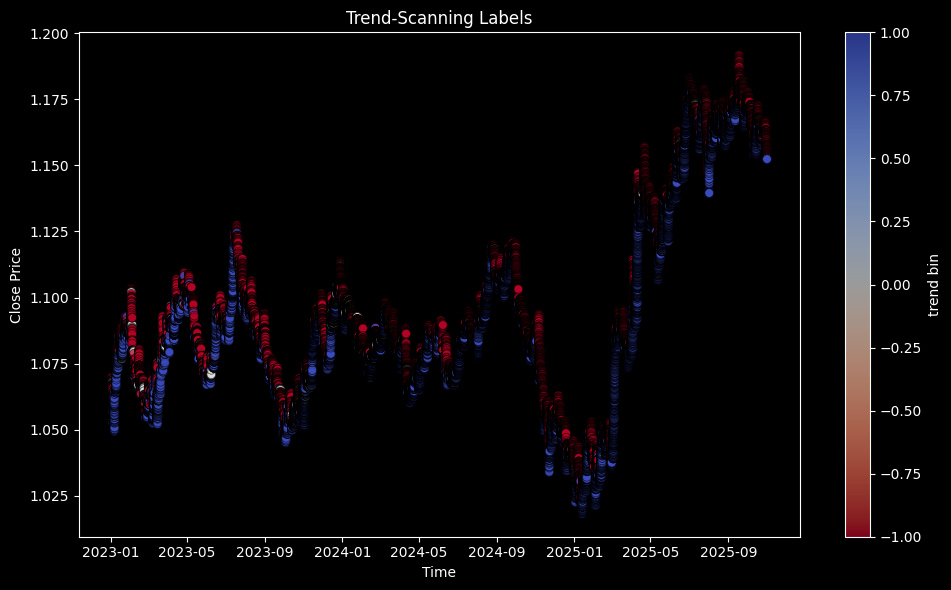

In [12]:
plot_trend_labels(close, trend_labels)

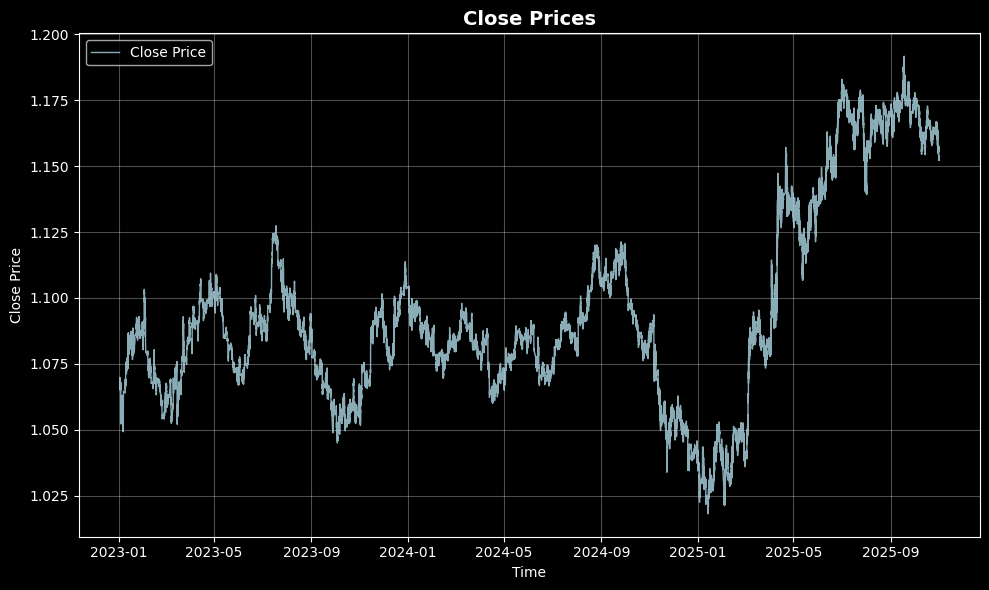

In [13]:
# Plot close prices for comparison
import matplotlib.pyplot as plt

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Plot full close price series only
ax.plot(close.index, close.values, linewidth=1, alpha=0.8, color='lightblue', label='Close Price')

ax.set_title('Close Prices', fontsize=14, fontweight='bold')
ax.set_xlabel('Time')
ax.set_ylabel('Close Price')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

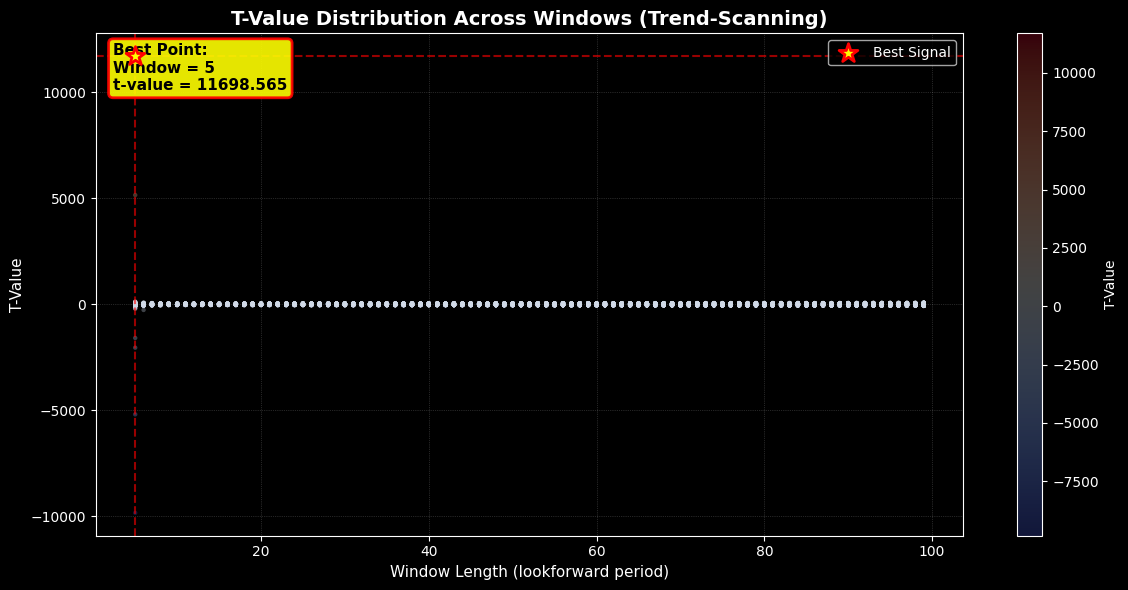

Best window: 5
Best t-value: 11698.565
T-value range: [-9835.693, 11698.565]
Mean t-value: 0.331
Std t-value: 26.722
Total observations: 685,934
Window range: 5 to 99


In [14]:
# Plot t-value vs window with best window highlighted
import matplotlib.pyplot as plt
import numpy as np

# Get all data points
windows = trend_labels['window'].values
t_values = trend_labels['t_value'].values

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)

# Scatter plot of all individual data points
scatter = ax.scatter(windows, t_values, alpha=0.3, c=t_values, cmap='coolwarm', s=10, edgecolors='none')

# Find the best (max absolute t-value) point
best_idx = np.argmax(np.abs(t_values))
best_window = windows[best_idx]
best_t_value = t_values[best_idx]

# Highlight the best point
ax.scatter(best_window, best_t_value, color='yellow', s=200, marker='*', 
           edgecolors='red', linewidths=2, zorder=5, label='Best Signal')

# Add horizontal line at best t-value
ax.axhline(best_t_value, color='red', linestyle='--', linewidth=1.5, alpha=0.6)

# Add vertical line at best window
ax.axvline(best_window, color='red', linestyle='--', linewidth=1.5, alpha=0.6)

# Add text box with best values
textstr = f'Best Point:\nWindow = {best_window}\nt-value = {best_t_value:.3f}'
props = dict(boxstyle='round', facecolor='yellow', alpha=0.9, edgecolor='red', linewidth=2)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props, color='black', fontweight='bold')

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax, label='T-Value')

ax.set_title('T-Value Distribution Across Windows (Trend-Scanning)', fontsize=14, fontweight='bold')
ax.set_xlabel('Window Length (lookforward period)', fontsize=11)
ax.set_ylabel('T-Value', fontsize=11)
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

print(f"Best window: {best_window}")
print(f"Best t-value: {best_t_value:.3f}")
print(f"T-value range: [{t_values.min():.3f}, {t_values.max():.3f}]")
print(f"Mean t-value: {t_values.mean():.3f}")
print(f"Std t-value: {t_values.std():.3f}")
print(f"Total observations: {len(t_values):,}")
print(f"Window range: {windows.min()} to {windows.max()}")

T-value range: [-9835.69, 11698.56]
95th percentile (abs): 30.01
99th percentile (abs): 40.67
Values beyond ±41: 6,860


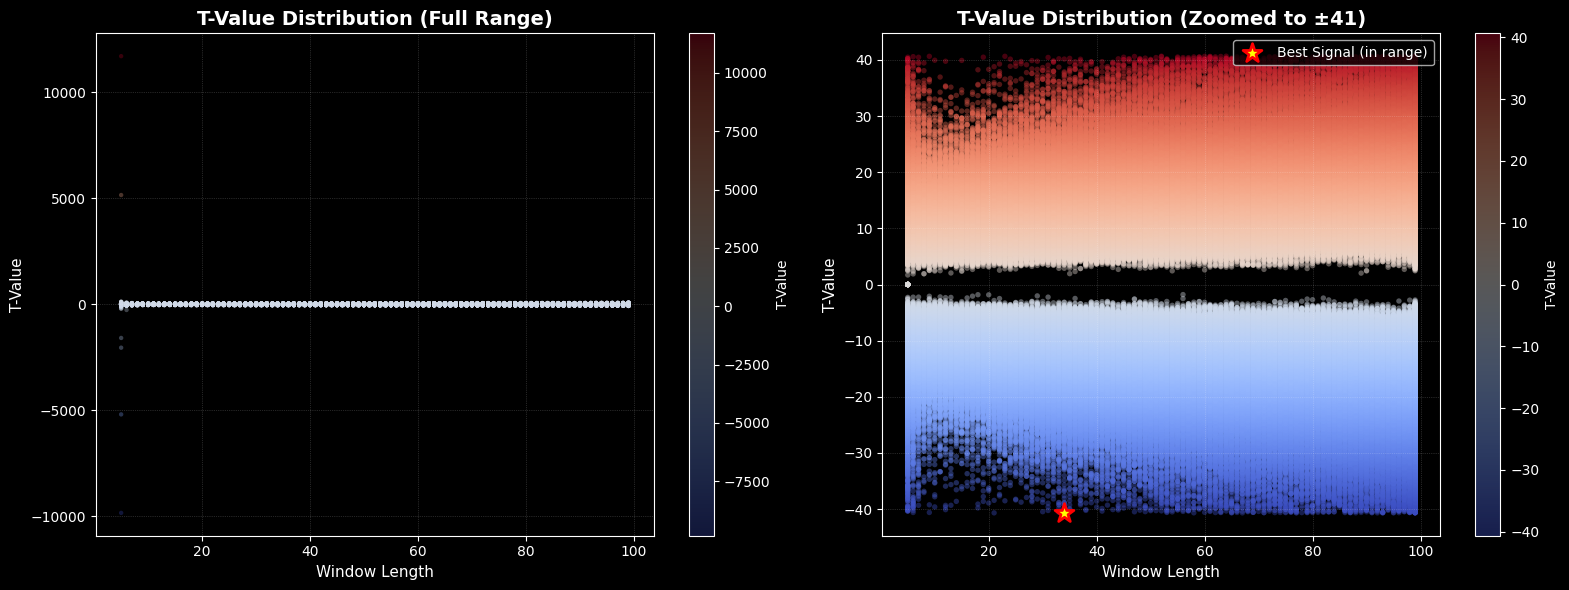


Filtered view shows 679,074 out of 685,934 observations


In [15]:
# Plot with filtered t-values (clip to reasonable range for visualization)
import matplotlib.pyplot as plt
import numpy as np

# Get all data points
windows = trend_labels['window'].values
t_values = trend_labels['t_value'].values

# Calculate percentiles for better visualization
p95 = np.percentile(np.abs(t_values), 95)
p99 = np.percentile(np.abs(t_values), 99)

print(f"T-value range: [{t_values.min():.2f}, {t_values.max():.2f}]")
print(f"95th percentile (abs): {p95:.2f}")
print(f"99th percentile (abs): {p99:.2f}")
print(f"Values beyond ±{p99:.0f}: {(np.abs(t_values) > p99).sum():,}")

# Create two plots: full range and zoomed
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=100)
plt.style.use("dark_background")

# Left plot: Full range (shows the extreme outliers)
scatter1 = ax1.scatter(windows, t_values, alpha=0.3, c=t_values, cmap='coolwarm', s=10, edgecolors='none')
ax1.set_title('T-Value Distribution (Full Range)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Window Length', fontsize=11)
ax1.set_ylabel('T-Value', fontsize=11)
ax1.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
fig.colorbar(scatter1, ax=ax1, label='T-Value')

# Right plot: Zoomed to ±99th percentile for better visibility
mask = np.abs(t_values) <= p99
windows_filtered = windows[mask]
t_values_filtered = t_values[mask]

scatter2 = ax2.scatter(windows_filtered, t_values_filtered, alpha=0.4, c=t_values_filtered, 
                       cmap='coolwarm', s=15, edgecolors='none')

# Find best within filtered range
best_idx_filtered = np.argmax(np.abs(t_values_filtered))
best_window_filtered = windows_filtered[best_idx_filtered]
best_t_value_filtered = t_values_filtered[best_idx_filtered]

ax2.scatter(best_window_filtered, best_t_value_filtered, color='yellow', s=200, marker='*', 
           edgecolors='red', linewidths=2, zorder=5, label='Best Signal (in range)')

ax2.set_title(f'T-Value Distribution (Zoomed to ±{p99:.0f})', fontsize=14, fontweight='bold')
ax2.set_xlabel('Window Length', fontsize=11)
ax2.set_ylabel('T-Value', fontsize=11)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
fig.colorbar(scatter2, ax=ax2, label='T-Value')

plt.tight_layout()
plt.show()

print(f"\nFiltered view shows {len(t_values_filtered):,} out of {len(t_values):,} observations")

Plotting data for: 2023-01-13
Number of observations: 474
Time range: 2023-01-13 00:10:31.196001 to 2023-01-13 23:53:48.161001


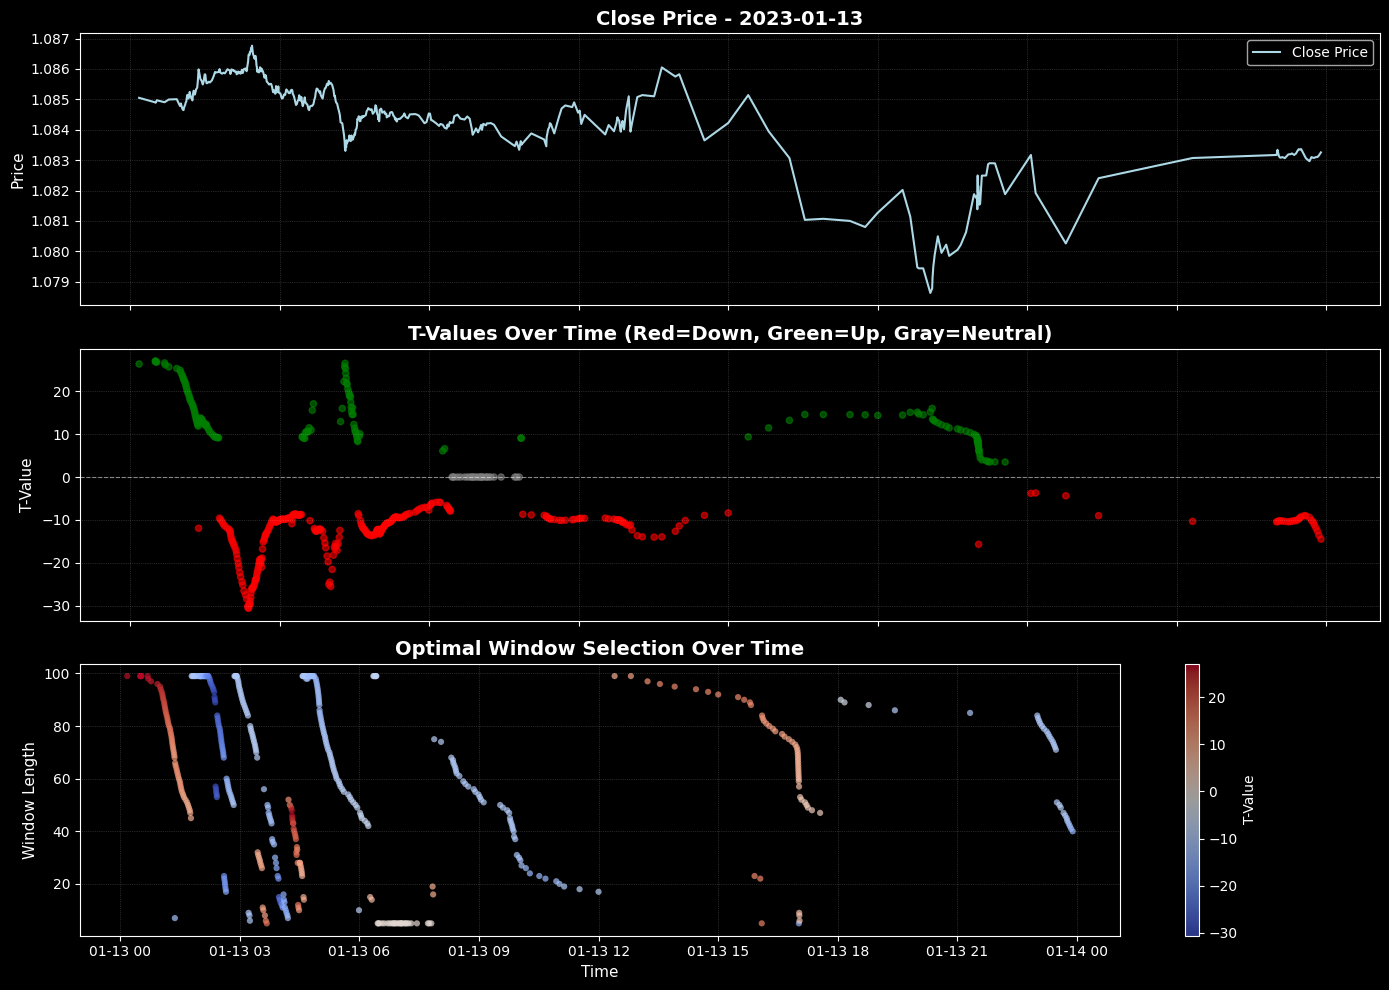


Day Statistics:
  Mean window: 59.9
  Most common window: 99
  Window range: 5 to 99
  Mean |t-value|: 12.66
  Label distribution: Up=158, Down=290, Neutral=26


In [16]:
# Plot single day like the article - showing how window selection varies over time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Select a single day of data
sample_date = trend_labels.index[5000]  # Pick a date in the middle
start_date = sample_date.normalize()  # Start of that day
end_date = start_date + pd.Timedelta(days=1)  # End of that day

# Filter to single day
day_mask = (trend_labels.index >= start_date) & (trend_labels.index < end_date)
day_labels = trend_labels[day_mask].copy()

if len(day_labels) == 0:
    print(f"No data for {start_date.date()}, trying another day...")
    # Try a few dates
    for offset in [10000, 20000, 50000]:
        sample_date = trend_labels.index[min(offset, len(trend_labels)-1)]
        start_date = sample_date.normalize()
        end_date = start_date + pd.Timedelta(days=1)
        day_mask = (trend_labels.index >= start_date) & (trend_labels.index < end_date)
        day_labels = trend_labels[day_mask].copy()
        if len(day_labels) > 0:
            break

print(f"Plotting data for: {start_date.date()}")
print(f"Number of observations: {len(day_labels)}")
print(f"Time range: {day_labels.index[0]} to {day_labels.index[-1]}")

# Create figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), dpi=100, sharex=True)
plt.style.use("dark_background")

# Plot 1: Close prices
day_close = close.loc[start_date:end_date]
ax1.plot(day_close.index, day_close.values, linewidth=1.5, color='lightblue', label='Close Price')
ax1.set_title(f'Close Price - {start_date.date()}', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price', fontsize=11)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)

# Plot 2: T-values over time
colors = ['red' if b == -1 else 'green' if b == 1 else 'gray' for b in day_labels['bin']]
scatter = ax2.scatter(day_labels.index, day_labels['t_value'], c=colors, s=20, alpha=0.6)
ax2.axhline(0, color='white', linestyle='--', linewidth=0.8, alpha=0.5)
ax2.set_title('T-Values Over Time (Red=Down, Green=Up, Gray=Neutral)', fontsize=14, fontweight='bold')
ax2.set_ylabel('T-Value', fontsize=11)
ax2.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)

# Plot 3: Selected window lengths over time
colors_window = day_labels['t_value'].values
scatter3 = ax3.scatter(day_labels.index, day_labels['window'], c=colors_window, 
                       cmap='coolwarm', s=20, alpha=0.7, edgecolors='none')
ax3.set_title('Optimal Window Selection Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('Time', fontsize=11)
ax3.set_ylabel('Window Length', fontsize=11)
ax3.grid(True, alpha=0.3, linestyle=':', linewidth=0.5)
cbar = fig.colorbar(scatter3, ax=ax3, label='T-Value')

plt.tight_layout()
plt.show()

# Summary statistics for the day
print(f"\nDay Statistics:")
print(f"  Mean window: {day_labels['window'].mean():.1f}")
print(f"  Most common window: {day_labels['window'].mode()[0]}")
print(f"  Window range: {day_labels['window'].min()} to {day_labels['window'].max()}")
print(f"  Mean |t-value|: {day_labels['t_value'].abs().mean():.2f}")
print(f"  Label distribution: Up={int((day_labels['bin']==1).sum())}, Down={int((day_labels['bin']==-1).sum())}, Neutral={int((day_labels['bin']==0).sum())}")

In [7]:
# Check t-values statistics and find extreme values
print("T-value Statistics:")
print(f"Min: {trend_labels['t_value'].min():.2f}")
print(f"Max: {trend_labels['t_value'].max():.2f}")
print(f"Mean: {trend_labels['t_value'].mean():.2f}")
print(f"Median: {trend_labels['t_value'].median():.2f}")
print(f"Std: {trend_labels['t_value'].std():.2f}")
print(f"\nPercentiles:")
print(trend_labels['t_value'].describe())
print(f"\nAbsolute t-value percentiles:")
abs_tvals = trend_labels['t_value'].abs()
print(f"50th: {abs_tvals.quantile(0.5):.2f}")
print(f"95th: {abs_tvals.quantile(0.95):.2f}")
print(f"99th: {abs_tvals.quantile(0.99):.2f}")
print(f"99.9th: {abs_tvals.quantile(0.999):.2f}")

# Find extreme values
print("\n" + "="*60)
print("EXTREME T-VALUES:")
print("="*60)

# Find maximum absolute t-value
max_abs_idx = trend_labels['t_value'].abs().idxmax()
max_abs_row = trend_labels.loc[max_abs_idx]
print(f"\nMaximum Absolute T-Value:")
print(f"  Index/Timestamp: {max_abs_idx}")
print(f"  T-Value: {max_abs_row['t_value']:.2f}")
print(f"  Window: {max_abs_row['window']}")
print(f"  Bin: {max_abs_row['bin']}")
print(f"  Return: {max_abs_row['ret']:.6f}")
print(f"  R²: {max_abs_row['rsquared']:.4f}")

# Find minimum t-value
min_idx = trend_labels['t_value'].idxmin()
min_row = trend_labels.loc[min_idx]
print(f"\nMinimum T-Value (most negative):")
print(f"  Index/Timestamp: {min_idx}")
print(f"  T-Value: {min_row['t_value']:.2f}")
print(f"  Window: {min_row['window']}")
print(f"  Bin: {min_row['bin']}")
print(f"  Return: {min_row['ret']:.6f}")
print(f"  R²: {min_row['rsquared']:.4f}")

# Find maximum t-value
max_idx = trend_labels['t_value'].idxmax()
max_row = trend_labels.loc[max_idx]
print(f"\nMaximum T-Value (most positive):")
print(f"  Index/Timestamp: {max_idx}")
print(f"  T-Value: {max_row['t_value']:.2f}")
print(f"  Window: {max_row['window']}")
print(f"  Bin: {max_row['bin']}")
print(f"  Return: {max_row['ret']:.6f}")
print(f"  R²: {max_row['rsquared']:.4f}")

# Find top 5 extreme values (both positive and negative)
print(f"\nTop 5 Extreme T-Values (by absolute value):")
top_extreme = trend_labels.nlargest(5, 't_value', keep='all')[['t_value', 'window', 'bin', 'ret', 'rsquared']]
print(top_extreme)

print(f"\nBottom 5 Extreme T-Values (most negative):")
bottom_extreme = trend_labels.nsmallest(5, 't_value', keep='all')[['t_value', 'window', 'bin', 'ret', 'rsquared']]
print(bottom_extreme)

T-value Statistics:
Min: -25708.66
Max: 26767.84
Mean: 0.35
Median: 0.00
Std: 77.80

Percentiles:
count    685934.000000
mean          0.354046
std          77.803333
min      -25708.660419
25%         -13.237571
50%           0.000000
75%          13.640424
max       26767.840898
Name: t_value, dtype: float64

Absolute t-value percentiles:
50th: 13.44
95th: 30.00
99th: 40.66
99.9th: 55.38

EXTREME T-VALUES:

Maximum Absolute T-Value:
  Index/Timestamp: 2024-02-13 02:54:05.576001
  T-Value: 26767.84
  Window: 5
  Bin: 1
  Return: 0.000223
  R²: 1.0000

Minimum T-Value (most negative):
  Index/Timestamp: 2024-02-12 15:35:01.714001
  T-Value: -25708.66
  Window: 5
  Bin: -1
  Return: -0.000297
  R²: 1.0000

Maximum T-Value (most positive):
  Index/Timestamp: 2024-02-13 02:54:05.576001
  T-Value: 26767.84
  Window: 5
  Bin: 1
  Return: 0.000223
  R²: 1.0000

Top 5 Extreme T-Values (by absolute value):
                                 t_value  window  bin       ret  rsquared
2024-02-13 02:

In [10]:
# Reload the module with the fix and regenerate labels
import importlib
import trend_scanning
importlib.reload(trend_scanning)
from trend_scanning import trend_scanning_labels

# Regenerate labels with capped t-values
print("Regenerating trend labels with t-value capping...")
trend_labels_capped = trend_scanning_labels(
    close,
    span=(5, 100), 
    volatility_threshold=0.05,
    lookforward=True,
    use_log=False,
    verbose=True
)

print("\nCapped T-value Statistics:")
print(f"Min: {trend_labels_capped['t_value'].min():.2f}")
print(f"Max: {trend_labels_capped['t_value'].max():.2f}")
print(f"Mean: {trend_labels_capped['t_value'].mean():.2f}")
print(f"Median: {trend_labels_capped['t_value'].median():.2f}")
print(f"Std: {trend_labels_capped['t_value'].std():.2f}")

print("\nComparing original vs capped:")
print(f"Original range: [{trend_labels['t_value'].min():.2f}, {trend_labels['t_value'].max():.2f}]")
print(f"Capped range: [{trend_labels_capped['t_value'].min():.2f}, {trend_labels_capped['t_value'].max():.2f}]")
print(f"Values capped: {(trend_labels['t_value'].abs() > 20).sum():,} out of {len(trend_labels):,}")

Regenerating trend labels with t-value capping...
Processing horizon 99
Capped T-value Statistics:
Min: -9835.69
Max: 11698.56
Mean: 0.35
Median: 0.00
Std: 28.16

Comparing original vs capped:
Original range: [-25708.66, 26767.84]
Capped range: [-9835.69, 11698.56]
Values capped: 149,433 out of 685,934

Capped T-value Statistics:
Min: -9835.69
Max: 11698.56
Mean: 0.35
Median: 0.00
Std: 28.16

Comparing original vs capped:
Original range: [-25708.66, 26767.84]
Capped range: [-9835.69, 11698.56]
Values capped: 149,433 out of 685,934
